In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
df = pd.read_excel(r'D:\LocalData\peterk2\Desktop\CR Emergency Braking Estimation.xlsx')

In [43]:
dfNoShifter = df[df['Shifter Penalty']==0]

In [44]:
var = ['RoadTestScore','ReliabilityGt50','ReliabilityLt50','ReliabilityGt50Constant','ReliabilityLt50Constant','OwnerSatisfaction','Marginals','Poors','FEB']
dfNoShifter[var].head()

,RoadTestScore,ReliabilityGt50,ReliabilityLt50,ReliabilityGt50Constant,ReliabilityLt50Constant,OwnerSatisfaction,Marginals,Poors,FEB
2,82,83.44,0.00,1,0,80.68,0,0,0
3,83,83.44,0.00,1,0,80.68,0,0,0
5,75,0.00,41.97,0,1,76.31,0,0,0
7,81,0.00,47.20,0,1,78.09,0,0,0
9,84,0.00,31.55,0,1,78.01,0,0,0


In [45]:
X = dfNoShifter[var]
y = dfNoShifter['CROverallScore']

In [46]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CROverallScore   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.055e+04
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          2.60e-203
Time:                        10:02:34   Log-Likelihood:                -115.13
No. Observations:                 160   AIC:                             248.3
Df Residuals:                     151   BIC:                             275.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RoadTestScore               0.6759      0.005    139.130      0.000       0.666       0.686
ReliabilityGt50             0.2546      0.005     48.854      0.000       0.244       0.265
ReliabilityLt50             0.4642      0.005     91.102      0.000       0.454       0.474
ReliabilityGt50Constant     1.7390      0.521      3.339      0.001       0.710       2.768
ReliabilityLt50Constant    -8.9510      0.412    -21.703      0.000      -9.766      -8.136
OwnerSatisfaction           0.0486      0.005      9.205      0.000       0.038       0.059
Marginals                  -2.2553      0.129    -17.461      0.000      -2.510      -2.000
Poors                      -5.6287      0.377    -14.917      0.000      -6.374      -4.883
FEB                         0.9530      0.038     25.002      0.000       0.878       1.028
==============================================================================
Omnibus:                        4.351   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.852
Skew:                          -0.176   Prob(JB):                       0.0884
Kurtosis:                       3.777   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

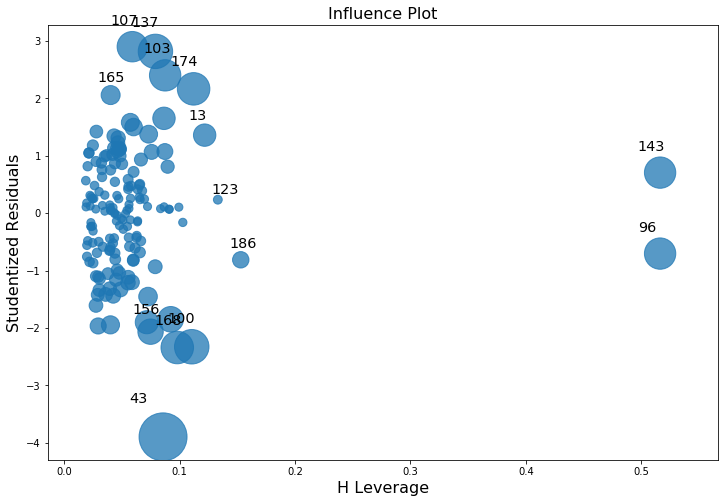

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

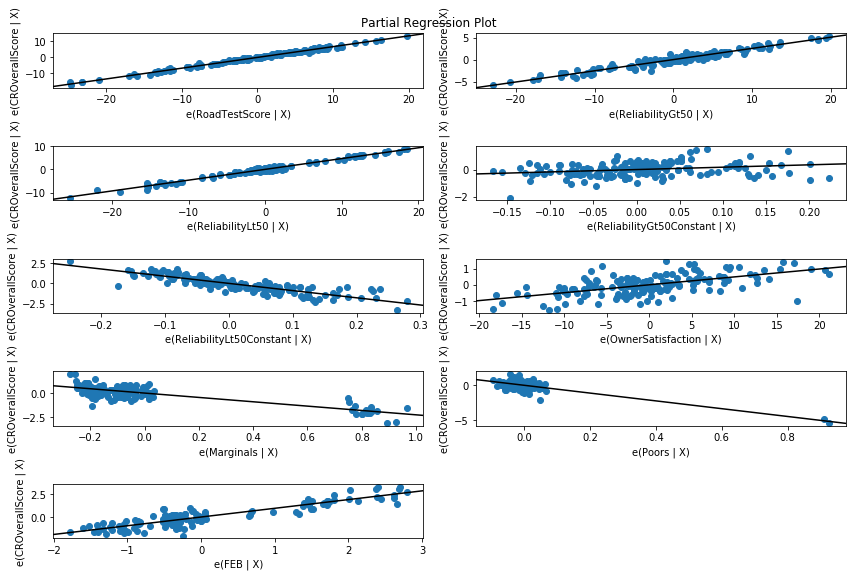

In [48]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

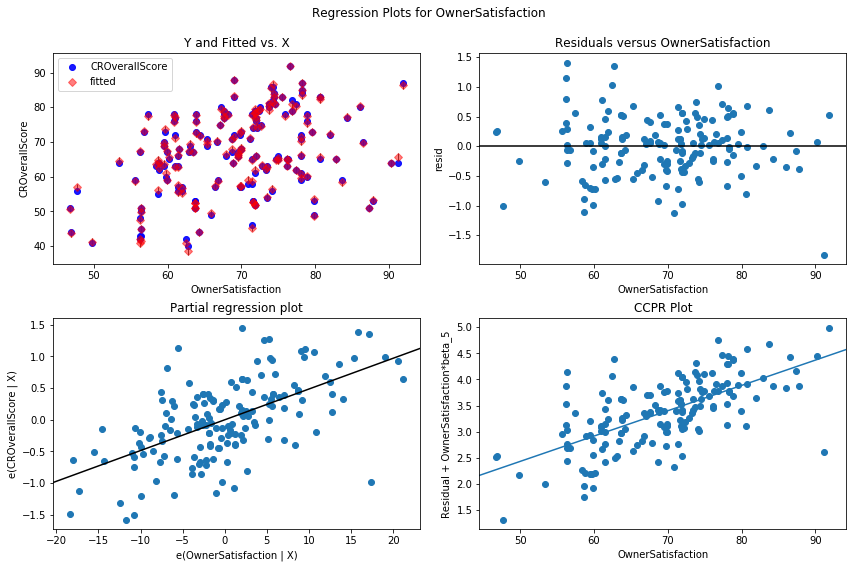

In [50]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "OwnerSatisfaction", fig=fig)

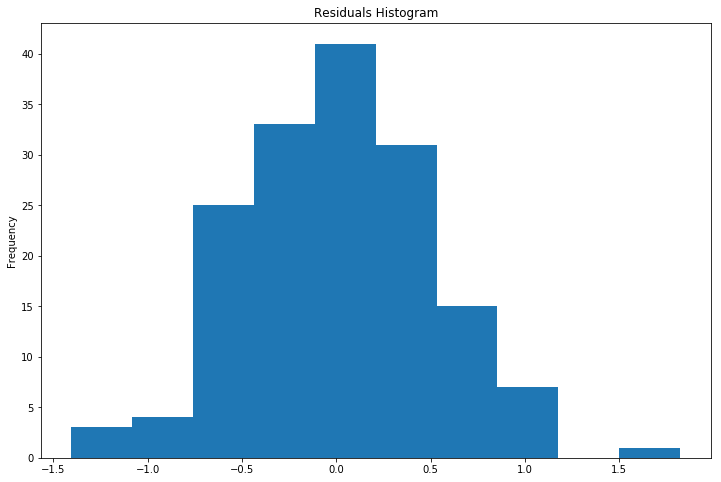

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Residuals Histogram')
(predictions-y).plot(ax=ax, kind='hist')

In [18]:
Xall = df[var]
yall = df['CROverallScore']
fullPredictions = model.predict(Xall)

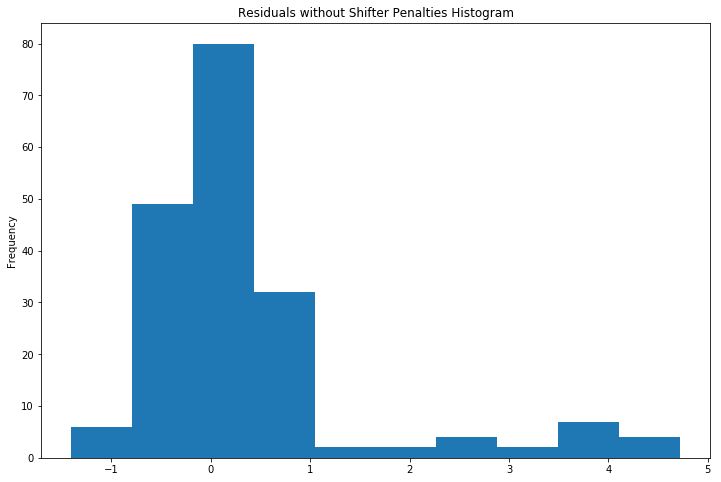

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Residuals without Shifter Penalties Histogram')
(fullPredictions-yall).plot(ax=ax, kind='hist')

In [10]:
formulaString = 'CROverallScore ~ RoadTestScore + ReliabilityGt50 + ReliabilityLt50 + ReliabilityGt50Constant + ReliabilityLt50Constant + OwnerSatisfaction + Marginals + Poors + FEB'
crime_model = sm.formula.ols(formulaString, data=dfNoShifter).fit()
print(crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:         CROverallScore   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.055e+04
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          2.60e-203
Time:                        09:37:51   Log-Likelihood:                -115.13
No. Observations:                 160   AIC:                             248.3
Df Residuals:                     151   BIC:                             275.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [9]:
from statsmodels.formula.api import rlm

In [11]:
rob_crime_model = rlm(formulaString, data=dfNoShifter, M=sm.robust.norms.TukeyBiweight(3)).fit(conv="weights")
print(rob_crime_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:         CROverallScore   No. Observations:                  160
Model:                            RLM   Df Residuals:                      151
Method:                          IRLS   Df Model:                            8
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 15 Mar 2018                                         
Time:                        09:38:20                                         
No. Iterations:                    49                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [22]:
weights = rob_crime_model.weights
idx = weights > 0
X = rob_crime_model.model.exog[idx.values]
ww = weights[idx] / weights[idx].mean()
hat_matrix_diag = ww*(X*np.linalg.pinv(X).T).sum(1)
resid = rob_crime_model.resid
resid2 = resid**2
resid2 /= resid2.sum()
nobs = int(idx.sum())
hm = hat_matrix_diag.mean()
rm = resid2.mean()

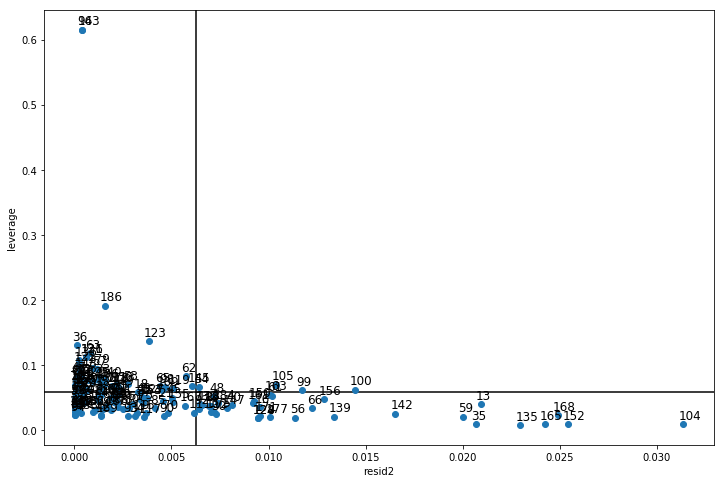

In [24]:
from statsmodels.graphics import utils
from statsmodels.compat import lzip
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(resid2[idx], hat_matrix_diag, 'o')
ax = utils.annotate_axes(range(nobs), labels=rob_crime_model.model.data.row_labels[idx], 
                    points=lzip(resid2[idx], hat_matrix_diag), offset_points=[(-5,5)]*nobs,
                    size="large", ax=ax)
ax.set_xlabel("resid2")
ax.set_ylabel("leverage")
ylim = ax.get_ylim()
ax.vlines(rm, *ylim)
xlim = ax.get_xlim()
ax.hlines(hm, *xlim)
ax.margins(0,0)

In [39]:
dfNoShifter.loc[43]

Year                                                                            2018
Full Name                                                    2018 Chevrolet Corvette
Make                                                                       Chevrolet
Model                                                                       Corvette
Trim                                      2-door hatchback 3LT V8-cyl 7-speed Manual
Body Type                                              2-door hatchback, convertible
CROverallScore                                                                    64
Calculated Overall Score                                                     65.7968
delta                                                                        1.79678
RoadTestScore                                                                     92
Reliability                                                                    17.57
ReliabilityGt50                                                  

In [31]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [38]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    pm.glm.GLM.from_formula(formulaString, dfNoShifter)
    trace = pm.sample(3000)

ValueError: No free random variables to sample.